In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from game import Game

In [3]:
%matplotlib inline

In [198]:
game = Game()
canvas = game.play()
canvas

TypeError: unsupported operand type(s) for -: 'tuple' and 'list'

In [42]:
game.covered[:,5] = 1
game.covered

array([[1., 0., 0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 1., 1., 1.]])

In [6]:
game.points

[array([0., 0., 1.]), array([ 0,  0, -1])]

In [31]:
game.theta

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.44879895, 0.44879895, 0.44879895, 0.44879895, 0.44879895,
        0.44879895, 0.44879895, 0.44879895],
       [0.8975979 , 0.8975979 , 0.8975979 , 0.8975979 , 0.8975979 ,
        0.8975979 , 0.8975979 , 0.8975979 ],
       [1.34639685, 1.34639685, 1.34639685, 1.34639685, 1.34639685,
        1.34639685, 1.34639685, 1.34639685],
       [1.7951958 , 1.7951958 , 1.7951958 , 1.7951958 , 1.7951958 ,
        1.7951958 , 1.7951958 , 1.7951958 ],
       [2.24399475, 2.24399475, 2.24399475, 2.24399475, 2.24399475,
        2.24399475, 2.24399475, 2.24399475],
       [2.6927937 , 2.6927937 , 2.6927937 , 2.6927937 , 2.6927937 ,
        2.6927937 , 2.6927937 , 2.6927937 ],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
        3.14159265, 3.14159265, 3.14159265]])

In [33]:
game.phi

array([[0.        , 0.8975979 , 1.7951958 , 2.6927937 , 3.5903916 ,
        4.48798951, 5.38558741, 6.28318531],
       [0.        , 0.8975979 , 1.7951958 , 2.6927937 , 3.5903916 ,
        4.48798951, 5.38558741, 6.28318531],
       [0.        , 0.8975979 , 1.7951958 , 2.6927937 , 3.5903916 ,
        4.48798951, 5.38558741, 6.28318531],
       [0.        , 0.8975979 , 1.7951958 , 2.6927937 , 3.5903916 ,
        4.48798951, 5.38558741, 6.28318531],
       [0.        , 0.8975979 , 1.7951958 , 2.6927937 , 3.5903916 ,
        4.48798951, 5.38558741, 6.28318531],
       [0.        , 0.8975979 , 1.7951958 , 2.6927937 , 3.5903916 ,
        4.48798951, 5.38558741, 6.28318531],
       [0.        , 0.8975979 , 1.7951958 , 2.6927937 , 3.5903916 ,
        4.48798951, 5.38558741, 6.28318531],
       [0.        , 0.8975979 , 1.7951958 , 2.6927937 , 3.5903916 ,
        4.48798951, 5.38558741, 6.28318531]])

In [69]:
import numpy as np
np.arccos(-1)

3.141592653589793

In [105]:
def fibonacci_sphere(samples=1000):

    points = []
    phi = np.pi * (3. - np.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
        radius = np.sqrt(1 - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = np.cos(theta) * radius
        z = np.sin(theta) * radius

        points.append((x, y, z))

    return points

In [141]:
from scipy.spatial import Delaunay, ConvexHull
points = np.array(fibonacci_sphere(16*16))
hull = ConvexHull(points)
tri = Delaunay(points)

345
(508, 3)


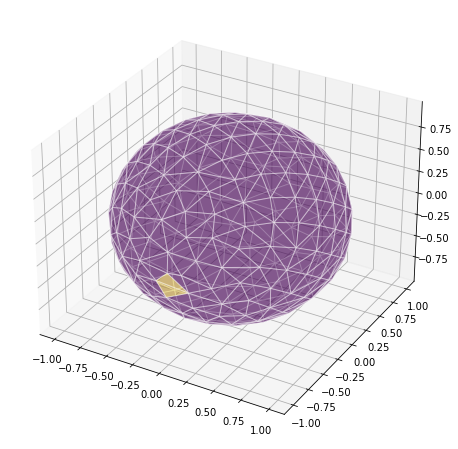

In [194]:
import matplotlib.pyplot as plt
from matplotlib import cm

# def in_hull(p, hull):
#     """
#     Test if points in `p` are in `hull`

#     `p` should be a `NxK` coordinates of `N` points in `K` dimensions
#     `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the 
#     coordinates of `M` points in `K`dimensions for which Delaunay triangulation
#     will be computed
#     """
#     from scipy.spatial import Delaunay
#     if not isinstance(hull,Delaunay):
#         hull = Delaunay(hull)

#     return hull.find_simplex(p)>=0

# points = np.array(game.points)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
print(tri.find_simplex(points[20]))
print(hull.simplices.shape)
c = np.zeros(hull.simplices.shape[0])
c[200] = 0.5
c[201] = 0.5
# ax.plot_wireframe(points[:,0], points[:,1], points[:,2])
ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=hull.simplices, array=c, alpha=0.4, edgecolor='white')
# plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [129]:
print(tri.simplices)

[[245  30  17  22]
 [245 188 167 154]
 [245 188 175 196]
 ...
 [245   2  10   7]
 [245  78  99 112]
 [245  78 112  91]]
